In [53]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import pandas as pd
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [54]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True
    )

In [55]:
data_train = pd.read_csv('./dataset/train.csv')
data_test = pd.read_csv('./dataset/test.csv')

In [56]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))



X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Normalization, BatchNormalization

### MODEL 1

In [58]:
batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(Dropout(0.4))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [59]:
model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_51 (Dropout)        (None, 5, 5, 64)        

In [60]:
history = model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model1.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
 46/188 [======>.......................] - ETA: 0s - loss: 1.3566 - accuracy: 0.5026

2023-05-02 14:15:07.034292: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_14/dropout_50/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


188/188 [==============================] - 1s 4ms/step - loss: 0.8356 - accuracy: 0.6890 - val_loss: 0.5264 - val_accuracy: 0.8099
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.5177 - accuracy: 0.8076 - val_loss: 0.4218 - val_accuracy: 0.8440
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4422 - accuracy: 0.8372 - val_loss: 0.3718 - val_accuracy: 0.8608
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3992 - accuracy: 0.8541 - val_loss: 0.3371 - val_accuracy: 0.8792
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3650 - accuracy: 0.8665 - val_loss: 0.3192 - val_accuracy: 0.8837
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3478 - accuracy: 0.8726 - val_loss: 0.2958 - val_accuracy: 0.8905
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.3328 - accuracy: 0.8782 - val_loss: 0.2910 - val_accuracy: 0.8958
Epoch 8/50
188/18

In [61]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21016231179237366
Test accuracy: 0.9230999946594238


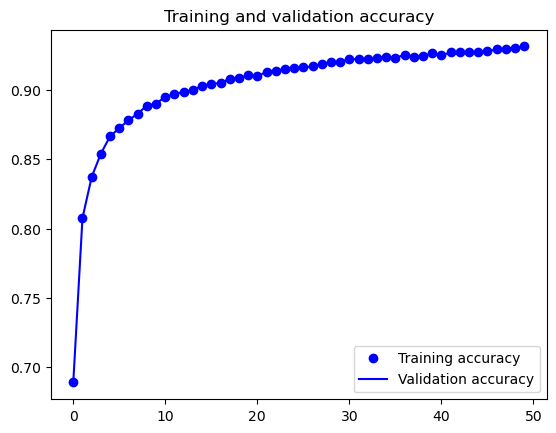

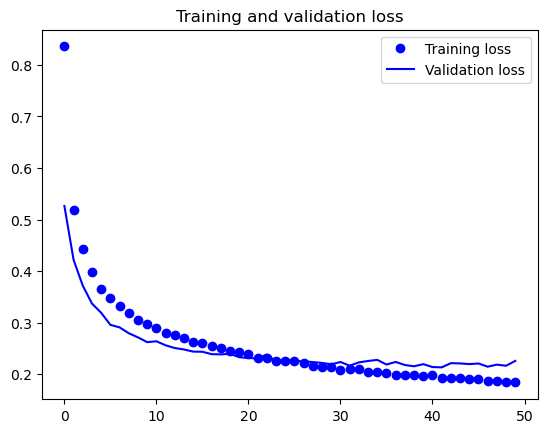

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### MODEL 2

In [63]:
batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model2 = Sequential()
#64
model2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model2.add(MaxPooling2D((2, 2)))
# dense + softmax 64
model2.add(Dense(64, activation='softmax'))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(num_classes, activation='softmax'))
#
model2.add(Dropout(0.2))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [64]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dense_40 (Dense)            (None, 13, 13, 64)        4160      
                                                                 
 dropout_54 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                

In [65]:
history = model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model2.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
  1/188 [..............................] - ETA: 1:29 - loss: 5.2651 - accuracy: 0.0938

2023-05-02 14:15:44.546351: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_15/dropout_55/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


188/188 [==============================] - 2s 7ms/step - loss: 3.9882 - accuracy: 0.5111 - val_loss: 0.6441 - val_accuracy: 0.7567
Epoch 2/50
188/188 [==============================] - 1s 6ms/step - loss: 3.6299 - accuracy: 0.6340 - val_loss: 0.5153 - val_accuracy: 0.8006
Epoch 3/50
188/188 [==============================] - 1s 6ms/step - loss: 3.5539 - accuracy: 0.6602 - val_loss: 0.4575 - val_accuracy: 0.8260
Epoch 4/50
188/188 [==============================] - 1s 6ms/step - loss: 3.5747 - accuracy: 0.6745 - val_loss: 0.4175 - val_accuracy: 0.8432
Epoch 5/50
188/188 [==============================] - 1s 6ms/step - loss: 3.5180 - accuracy: 0.6836 - val_loss: 0.3966 - val_accuracy: 0.8501
Epoch 6/50
188/188 [==============================] - 1s 6ms/step - loss: 3.5834 - accuracy: 0.6862 - val_loss: 0.3692 - val_accuracy: 0.8660
Epoch 7/50
188/188 [==============================] - 1s 6ms/step - loss: 3.5028 - accuracy: 0.6951 - val_loss: 0.3569 - val_accuracy: 0.8663
Epoch 8/50
188/18

In [66]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2065940946340561
Test accuracy: 0.9229000210762024


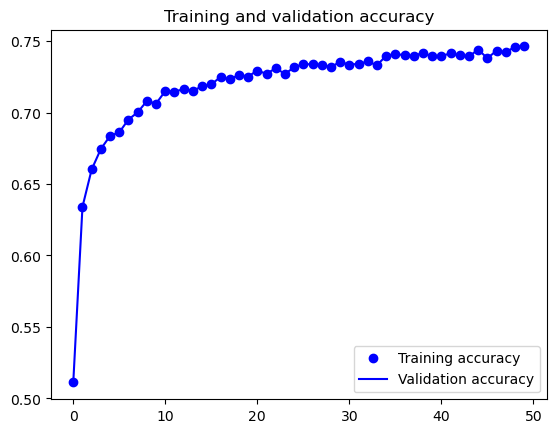

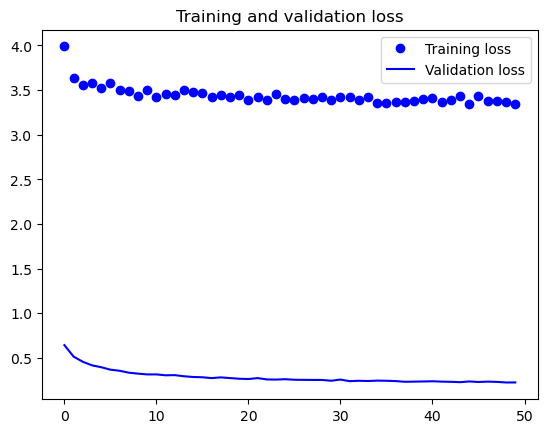

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### MODEL 3

In [80]:
batch_size = 256
num_classes = 10
epochs = 50

model3 = Sequential()
#64
model3.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model3.add(MaxPooling2D((2, 2)))
# dense + relu 256
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [78]:
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 dense_49 (Dense)            (None, 13, 13, 256)       65792     
                                                                 
 dropout_68 (Dropout)        (None, 13, 13, 256)       0         
                                                                 
 conv2d_53 (Conv2D)          (None, 11, 11, 64)        147520    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                

In [79]:
history = model3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model3.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
  1/188 [..............................] - ETA: 1:33 - loss: 2.4041 - accuracy: 0.0781

2023-05-02 14:23:26.636934: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_18/dropout_68/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


188/188 [==============================] - 4s 18ms/step - loss: 0.7094 - accuracy: 0.7391 - val_loss: 0.4064 - val_accuracy: 0.8497
Epoch 2/50
188/188 [==============================] - 3s 17ms/step - loss: 0.4202 - accuracy: 0.8474 - val_loss: 0.3447 - val_accuracy: 0.8739
Epoch 3/50
188/188 [==============================] - 3s 17ms/step - loss: 0.3566 - accuracy: 0.8708 - val_loss: 0.3021 - val_accuracy: 0.8892
Epoch 4/50
188/188 [==============================] - 3s 17ms/step - loss: 0.3188 - accuracy: 0.8830 - val_loss: 0.2891 - val_accuracy: 0.8941
Epoch 5/50
188/188 [==============================] - 3s 17ms/step - loss: 0.2988 - accuracy: 0.8907 - val_loss: 0.2724 - val_accuracy: 0.8977
Epoch 6/50
188/188 [==============================] - 3s 17ms/step - loss: 0.2823 - accuracy: 0.8963 - val_loss: 0.2606 - val_accuracy: 0.9023
Epoch 7/50
188/188 [==============================] - 3s 18ms/step - loss: 0.2626 - accuracy: 0.9043 - val_loss: 0.2550 - val_accuracy: 0.9053
Epoch 8/50

In [76]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20526215434074402
Test accuracy: 0.9283999800682068


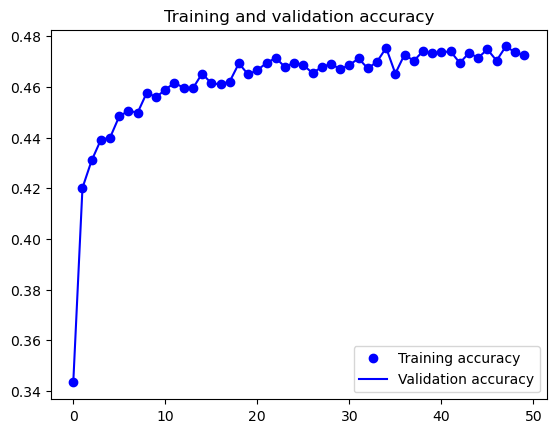

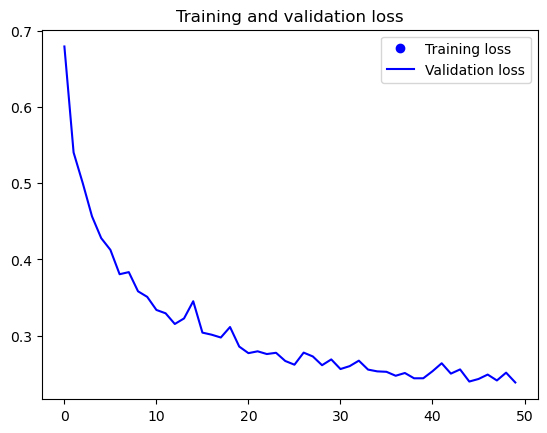

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()